# All Pipeline Codes Together

## Quality Control

In [5]:
import scanpy as sc
import matplotlib.pyplot as plt
import h5py

In [14]:
input_file = "/home/behrouz/Projects/scRNA-Seq-Pipeline/GSE280984/GSM8608377_day1"
adata = sc.read_10x_mtx(input_file, 
                        var_names='gene_symbols', 
                        cache=True)

/home/behrouz/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [24]:
# Shape of the matrix
print(adata.X.shape)

# Show the first 5 cells
print(adata.obs.head())

# Show the first 5 genes
print(adata.var.head())

(8607, 67053)
Empty DataFrame
Columns: []
Index: [AAACCCAAGGAATGTT-1, AAACCCACAATGCTCA-1, AAACCCACAGTCGGAA-1, AAACCCATCAGCCTTC-1, AAACCCATCCAATCTT-1]
                      gene_ids    feature_types
DDX11L1      ENSG00000223972.5  Gene Expression
WASH7P       ENSG00000227232.5  Gene Expression
MIR6859-1    ENSG00000278267.1  Gene Expression
MIR1302-2HG  ENSG00000243485.5  Gene Expression
MIR1302-2    ENSG00000284332.1  Gene Expression


In [41]:
# Find mitochondrial genes
adata.var_names[adata.var_names.str.startswith("MT-")]

Index(['MT-TF', 'MT-RNR1', 'MT-TV', 'MT-RNR2', 'MT-TL1', 'MT-ND1', 'MT-TI',
       'MT-TQ', 'MT-TM', 'MT-ND2', 'MT-TW', 'MT-TA', 'MT-TN', 'MT-TC', 'MT-TY',
       'MT-CO1', 'MT-TS1', 'MT-TD', 'MT-CO2', 'MT-TK', 'MT-ATP8', 'MT-ATP6',
       'MT-CO3', 'MT-TG', 'MT-ND3', 'MT-TR', 'MT-ND4L', 'MT-ND4', 'MT-TH',
       'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE', 'MT-CYB', 'MT-TT',
       'MT-TP'],
      dtype='object')

In [42]:
# Find mitochondrial genes in the anndata object
adata.var["mito"] = adata.var_names.str.startswith("MT-")

# total mitochondial genes 
adata.var["mito"].sum()

In [46]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars="mito", inplace=True)


In [47]:
# See the adata object
adata

AnnData object with n_obs × n_vars = 8607 × 67053
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito'

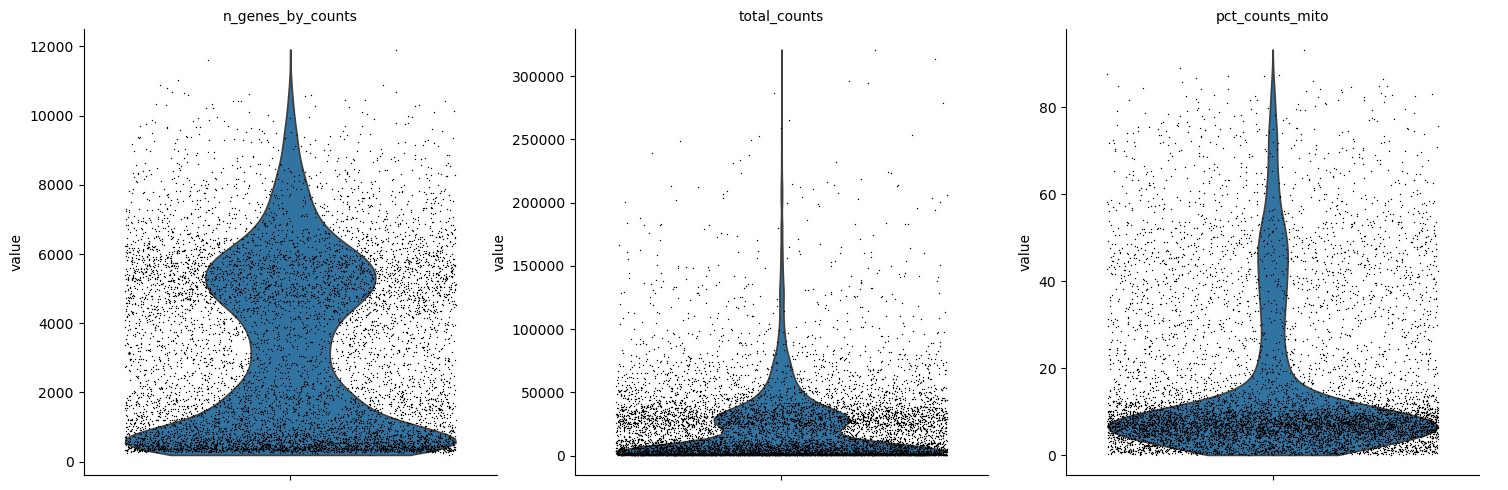

In [48]:
# Plot the QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', "pct_counts_mito"],
                 jitter=0.4, multi_panel=True)

In [49]:
# Filter cells based on QC metrics
sc.pp.filter_cells(adata, min_genes=200, inplace=True)
sc.pp.filter_genes(adata, min_cells=3, inplace=True)

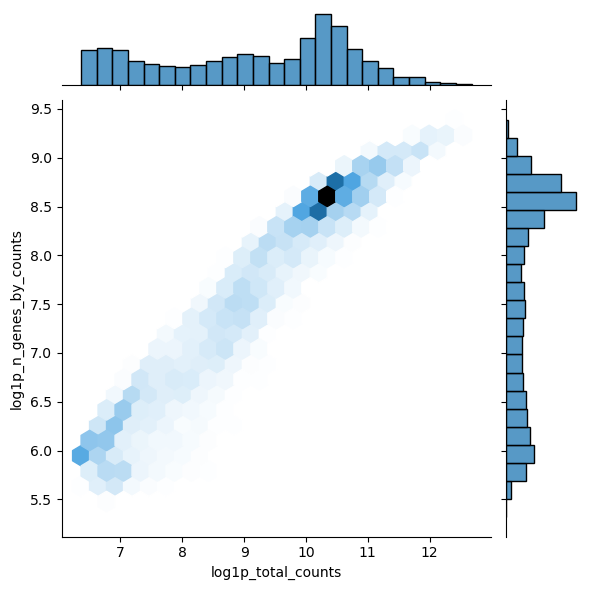

In [55]:
import seaborn as sns

sns.jointplot(
    data=adata.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

<Axes: xlabel='pct_counts_mito', ylabel='Count'>

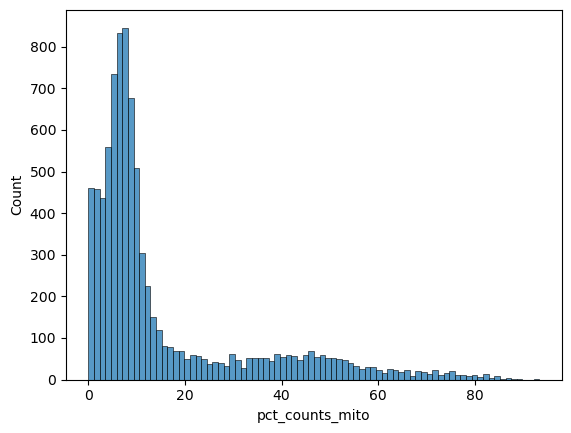

In [56]:
sns.histplot(adata.obs["pct_counts_mito"])

In [52]:
adata.write("GSM8608377_day1")

## Run PCA

In [60]:
# Scale each gene to the unit variance of that gene
sc.pp.scale(adata, max_value=10)

In [61]:
# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')

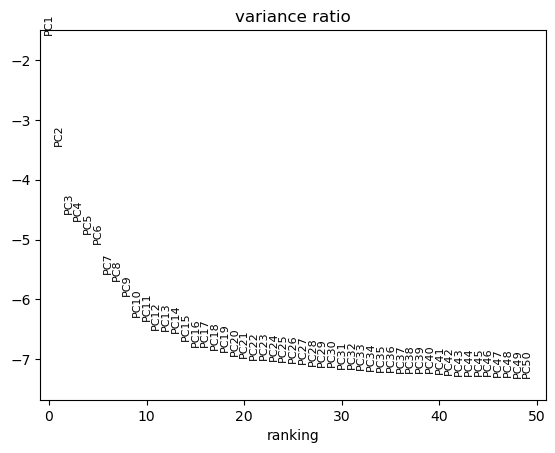

In [62]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

## Calculate Neighbors

In [92]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)

/home/behrouz/anaconda3/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 29136 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


## Perform UMAP

In [93]:
sc.tl.umap(adata)

In [94]:
import leidenalg

sc.tl.leiden(adata, resolution=0.5)

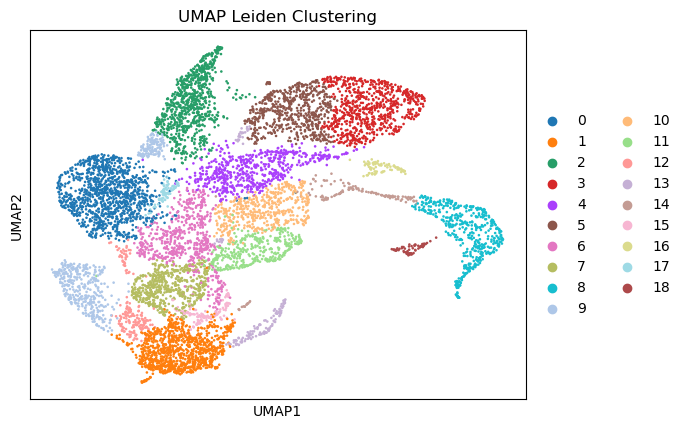

In [95]:
sc.pl.umap(adata, color=["leiden"], title="UMAP Leiden Clustering")

In [96]:
adata.write("GSM8608377_day1.h5ad")

## Cell Markers

In [97]:
# adata = sc.read("GSM8608377_day1.h5ad")

adata

AnnData object with n_obs × n_vars = 8606 × 29136
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito', 'n_cells'
    uns: 'rank_genes_groups', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [98]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

/home/behrouz/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/behrouz/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/behrouz/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/behrouz/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/behrouz/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/behrouz/anaconda3/lib/python3.12/site-packages/scanp

In [118]:
markers = sc.get.rank_genes_groups_df(adata, None)

markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]

markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,TINAGL1,51.669220,42.632988,0.000000,0.000000
1,0,ANXA2,51.603462,125.935959,0.000000,0.000000
2,0,PMEPA1,51.498753,74.940346,0.000000,0.000000
3,0,KRT19,51.452206,128.456390,0.000000,0.000000
4,0,ANXA4,51.380630,63.369923,0.000000,0.000000
...,...,...,...,...,...,...
531918,18,INTS9,2.490739,1.768781,0.012748,0.049582
531919,18,C6orf120,2.489943,1.207977,0.012776,0.049680
531920,18,DYM,2.489943,0.834773,0.012776,0.049680
531921,18,ANGEL2,2.488302,1.217730,0.012835,0.049903


In [120]:
markers.sort_values(["group", "logfoldchanges"], ascending=[True, False])

,group,names,scores,logfoldchanges,pvals,pvals_adj
23,0,TMSB4X,49.370125,436.600098,0.000000e+00,0.000000e+00
1923,0,MT-RNR2,28.334440,284.554199,1.301607e-176,1.971083e-175
1909,0,MT-CO3,28.400465,265.882568,1.995539e-177,3.044086e-176
52,0,ACTB,47.304047,234.884933,0.000000e+00,0.000000e+00
21,0,TMSB10,49.713047,232.716995,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
530519,18,DUSP23,3.341434,0.539339,8.334678e-04,3.996695e-03
530503,18,MKNK2,3.352774,0.537346,8.000607e-04,3.847263e-03
530121,18,ERGIC1,3.596949,0.536727,3.219719e-04,1.652744e-03
531535,18,HDHD3,2.732402,0.535626,6.287440e-03,2.580880e-02


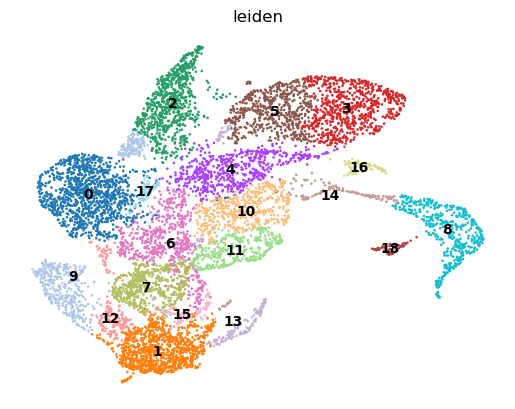

In [119]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")
